In [2]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq

In [2]:
import pandas as pd
import spacy
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

C:\Users\Vaishali\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
reports = pd.read_csv("../FYP/processed_data.csv")
reports.head()

,news_date,tokens
0,1/6/2011 2:45:49 PM,"நாலு,ஆள்,உயரம்,முறுக்கு,மீசை,கையில்,வீச்சரிவாள..."
1,1/6/2011 2:56:51 PM,"அமானுஷ்யமான,சம்பவம்,நம்,சுற்றி,ஆங்காங்கே,நட,கொ..."
2,1/6/2011 3:02:00 PM,"காமன்வெல்த்,போட்டி,ஏற்பாட்டில்,நடைபெறு,முறைகேட..."
3,1/6/2011 3:08:15 PM,"தென்அமெரிக்க,நாடான,பெருவில்,காடுகள்,பயங்கரமானவ..."
4,1/6/2011 3:09:20 PM,"கடந்த,ம்,தேதி,சாயங்காலம்,அடைமழையை,கிழித்தபடி,ச..."


In [5]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126746 entries, 0 to 126745
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   news_date  126746 non-null  object
 1   tokens     126746 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [11]:
reports["tokens"] = reports["tokens"].map(lambda x: x.split(","))

reports.head()

,news_date,tokens
0,1/6/2011 2:45:49 PM,"[நாலு, ஆள், உயரம், முறுக்கு, மீசை, கையில், வீச..."
1,1/6/2011 2:56:51 PM,"[அமானுஷ்யமான, சம்பவம், நம், சுற்றி, ஆங்காங்கே,..."
2,1/6/2011 3:02:00 PM,"[காமன்வெல்த், போட்டி, ஏற்பாட்டில், நடைபெறு, மு..."
3,1/6/2011 3:08:15 PM,"[தென்அமெரிக்க, நாடான, பெருவில், காடுகள், பயங்க..."
4,1/6/2011 3:09:20 PM,"[கடந்த, ம், தேதி, சாயங்காலம், அடைமழையை, கிழித்..."


In [34]:
len(reports)

126746

In [12]:
from gensim import corpora

text_data = reports["tokens"]
dictionary = corpora.Dictionary(text_data)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [13]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

In [25]:
topics = []
score = []

In [26]:
#C_umass score
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())

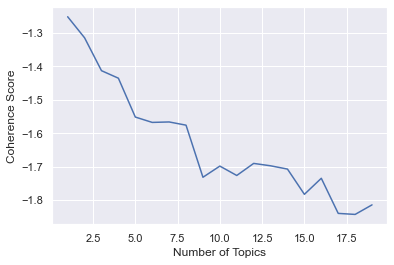

In [27]:
import matplotlib.pyplot as plt
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [29]:
#C_v score
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = reports['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())


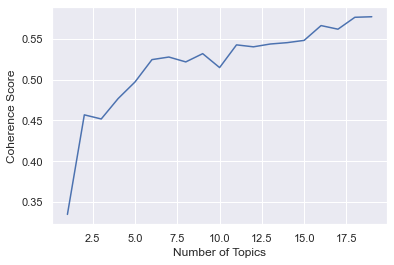

In [30]:
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [33]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=7, workers = 4, passes=100)

In [35]:
lda_model.print_topics(-1)

[(0,
  '0.024*"வரு" + 0.021*"பகுதி" + 0.019*"மக்கள்" + 0.019*"மணி" + 0.017*"செல்" + 0.015*"மாவட்டம்" + 0.015*"சென்னை" + 0.014*"இன்று" + 0.014*"பணி" + 0.013*"காலை"'),
 (1,
  '0.041*"போலீசார்" + 0.028*"வா" + 0.028*"சேர்" + 0.019*"செல்" + 0.015*"விசாரணை" + 0.014*"நேற்று" + 0.014*"கைது" + 0.012*"வீடு" + 0.012*"நடத்து" + 0.011*"அருகே"'),
 (2,
  '0.034*"ரூ" + 0.029*"ம்" + 0.028*"அரசு" + 0.018*"வேண்டு" + 0.017*"வழக்கு" + 0.016*"தேதி" + 0.015*"ஆண்டு" + 0.015*"கடந்த" + 0.014*"கோடி" + 0.014*"தமிழகம்"'),
 (3,
  '0.019*"வேண்டு" + 0.017*"ஆனால்" + 0.016*"வா" + 0.015*"இல்" + 0.015*"படம்" + 0.015*"படத்தில்" + 0.014*"கூறு" + 0.012*"தற்போது" + 0.011*"நடிக்க" + 0.011*"படு"'),
 (4,
  '0.030*"அரசு" + 0.028*"மத்திய" + 0.024*"வரு" + 0.018*"வேண்டு" + 0.016*"நடத்து" + 0.015*"இந்தியா" + 0.014*"நாடு" + 0.014*"மாநிலம்" + 0.014*"கடந்த" + 0.013*"குறி"'),
 (5,
  '0.042*"தேர்தல்" + 0.038*"தலைவர்" + 0.029*"கட்சி" + 0.023*"காங்கிரஸ்" + 0.023*"மாவட்டம்" + 0.021*"திமுக" + 0.020*"பாஜ" + 0.020*"செயலாளர்" + 0.019*"தலைமை" + 

In [36]:
lda_model[corpus][0]

[(0, 0.48286268), (1, 0.35839072), (3, 0.14729519)]

In [37]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


C:\Users\Vaishali\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
